In [4]:
!pip install ipywidgets

     ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
     ----------------- --------------------- 61.4/138.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 138.3/138.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/198.2 kB ? eta -:--:--
     -------------------------------------  194.6/198.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------  194.6/198.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 198.2/198.2 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.1 MB 2.6 MB/s eta 0:00:01
     ----- ---------------------------------- 0.3/2.1 MB 3.8 MB/s eta 0:00:01
     ------- -------------------------------- 0.4/2.1 MB 3.1 MB/s eta 0:00:01
     -------- ------------------------------- 0.5/2.1 MB 2.7 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 3.5 MB/s eta 0

In [3]:
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ---------------------------------------- 0.0/2.2 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.2 GB 6.5 MB/s eta 0:05:35
     ---------------------------------------- 0.0/2.2 GB 7.5 MB/s eta 0:04:51
     ---------------------------------------- 0.0/2.2 GB 5.5 MB/s eta 0:06:39
     ---------------------------------------- 0.0/2.2 GB 4.8 MB/s eta 0:07:36
     ---------------------------------------- 0.0/2.2 GB 4.9 MB/s eta 0:07:26
     ---------------------------------------- 0.0/2.2 GB 4.7 MB/s eta 0:07:50
     ---------------------------------------- 0.0/2.2 GB 4.4 MB/s eta 0:08:11
     ---------------------------------------- 0.0/2.2 GB 4.3 MB/s eta 0:08:32
     ---------------------------------------- 0.0/2.2 GB 4.0 MB/s eta 0:09:03
     ---------------------------------------- 0.0/2.2 GB 4.0 MB/s eta 0:09:13
     ---------------------------------------- 0.0/2.2 GB 3.8 MB/s

     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:06
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:04
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/s eta 0:02:05
     -------------------------------- ------- 1.8/2.2 GB 3.3 MB/

In [6]:
!pip install glob2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for glob2: started
  Running setup.py install for glob2: finished with status 'done'


  DEPRECATION: glob2 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [1]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

In [2]:
in_dir = 'D:/Liver_Segmentation/Data_Train_Test'
model_dir = 'D:/Liver_Segmentation/result'

In [3]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

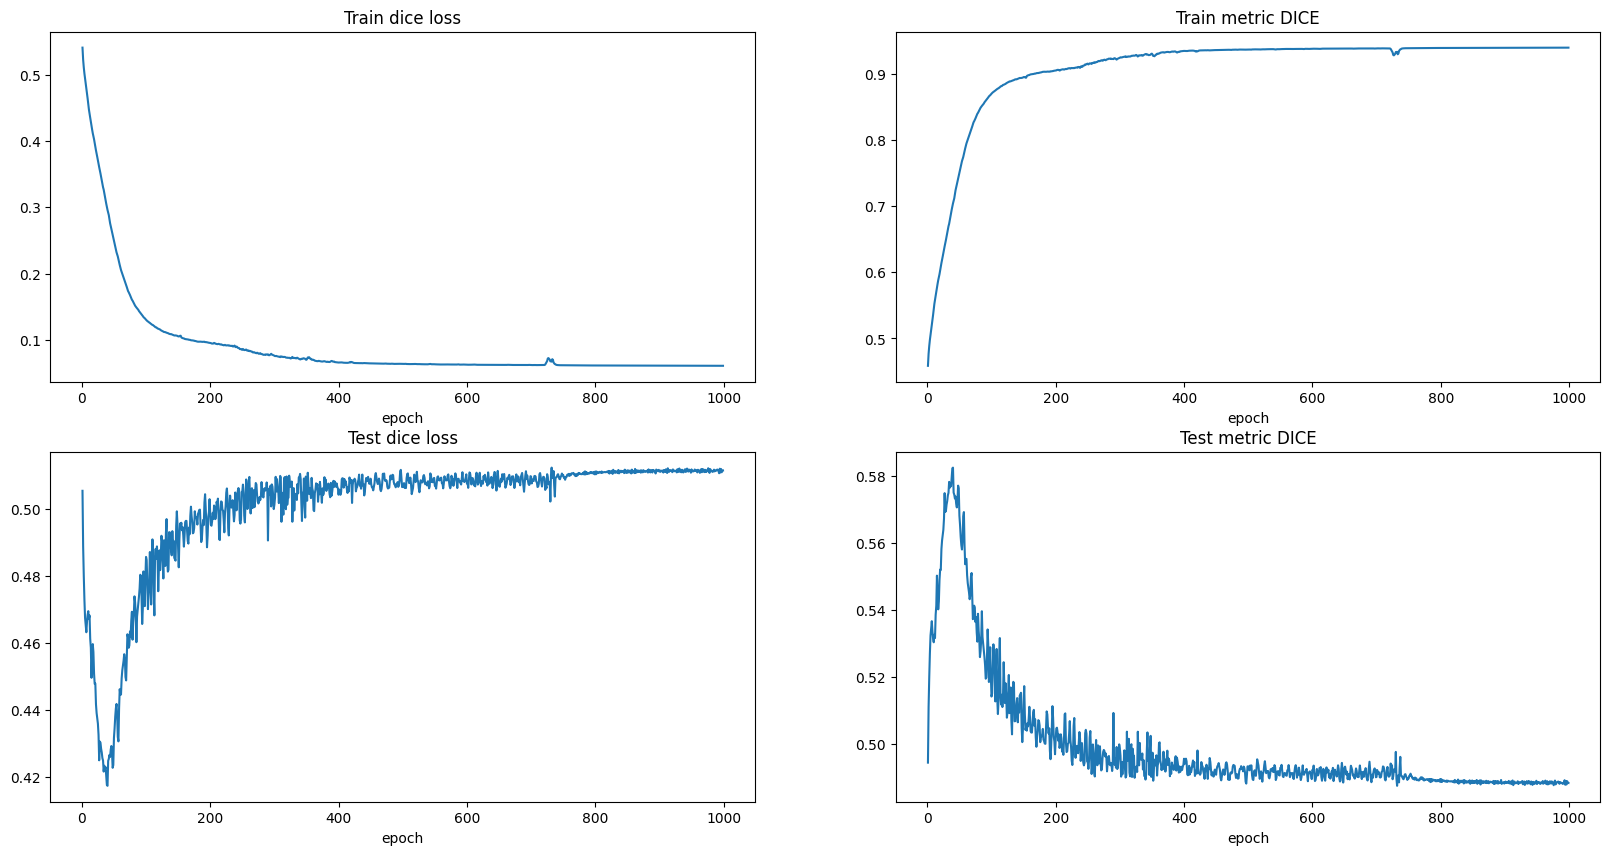

In [4]:
plt.figure("Results 17 April", (20,10))
plt.subplot(2,2,1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2,2,2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2,2,3)
plt.title("Test dice loss")
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2,2,4)
plt.title("Test metric DICE")
x = [i + 1 for i in range(len(test_metric))]
y = test_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.show()

In [5]:
path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainSegmentation", "*.nii.gz")))

path_test_volumes = sorted(glob(os.path.join(in_dir, "TestVolumes", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(in_dir, "TestSegmentation", "*.nii.gz")))

train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
test_files = test_files[0:9]

In [6]:
test_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=(1.5,1.5,1.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
        Resized(keys=["vol", "seg"], spatial_size=[128,128,64]),   
        ToTensord(keys=["vol", "seg"]),
    ]
)

D:\Liver_Segmentation\liver\lib\site-packages\monai\utils\deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


In [7]:
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [8]:
device = torch.device("cuda:0")
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

D:\Liver_Segmentation\liver\lib\site-packages\monai\utils\deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


In [9]:
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


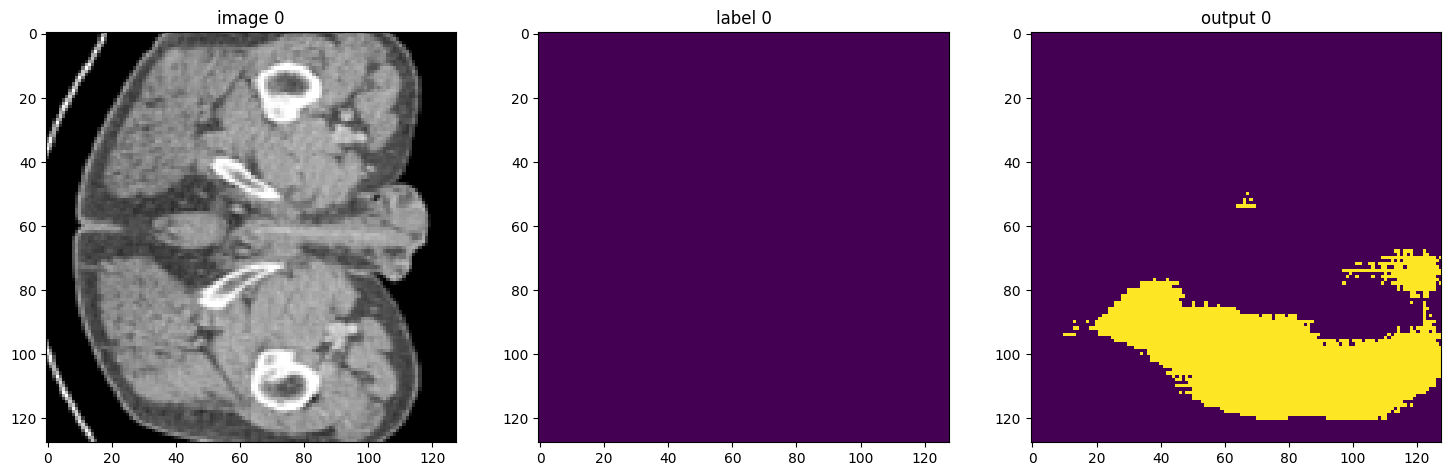

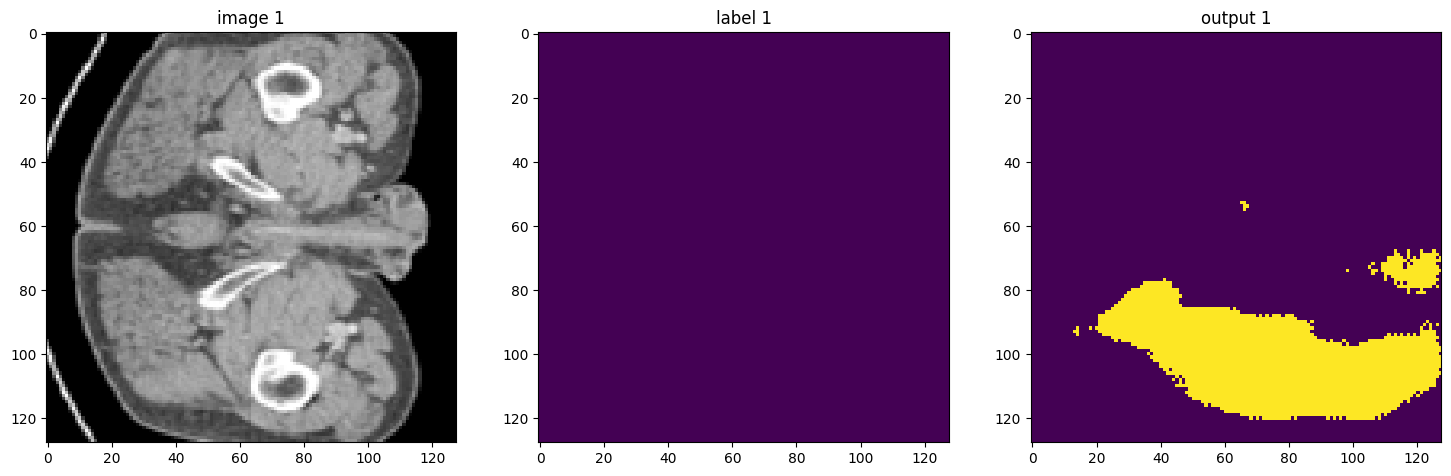

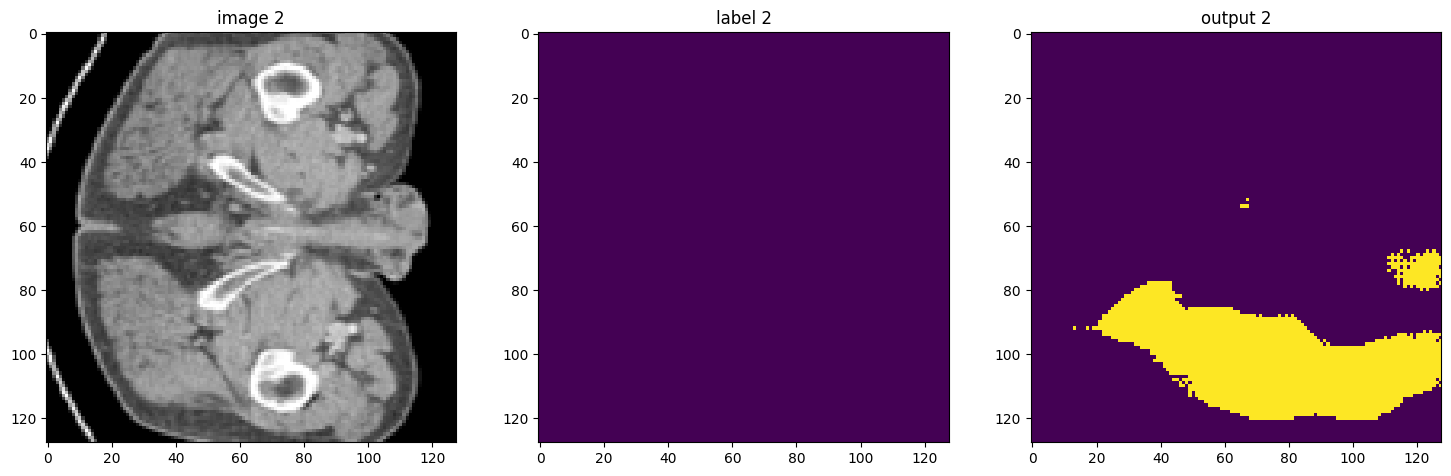

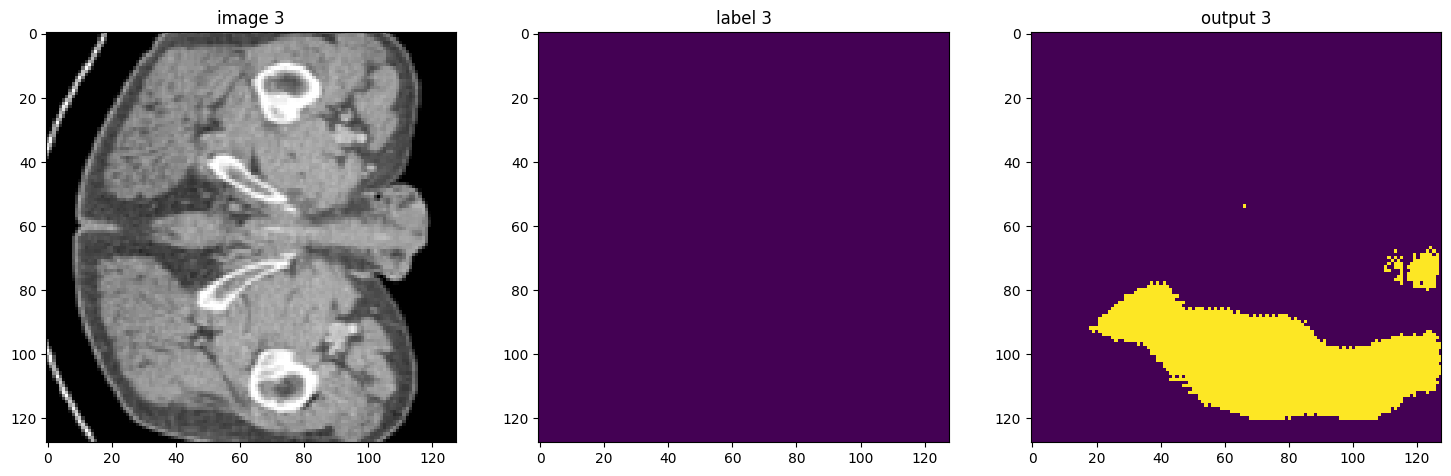

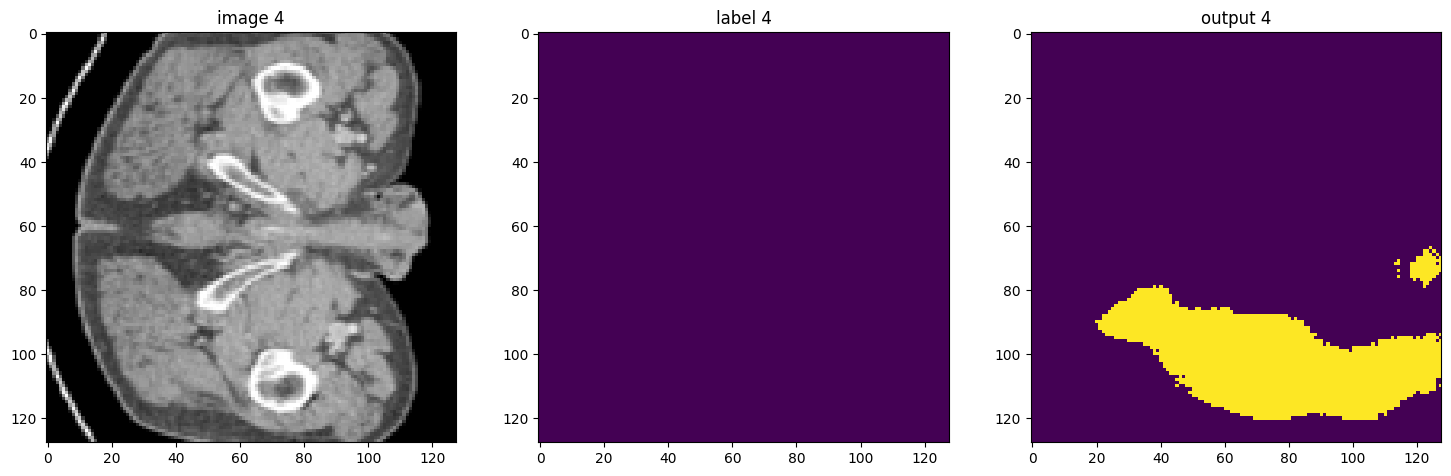

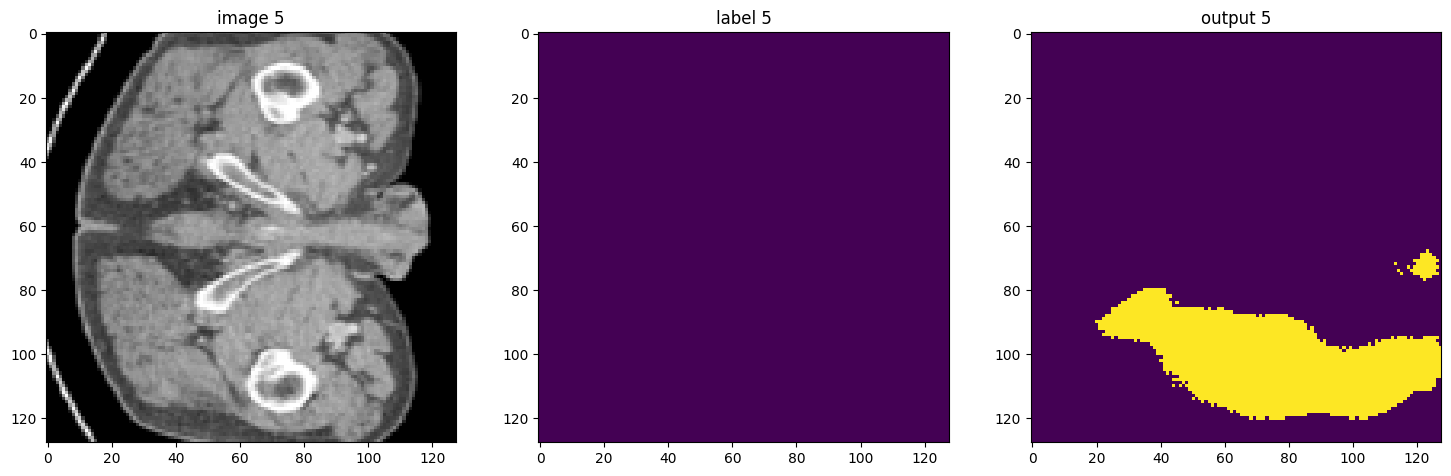

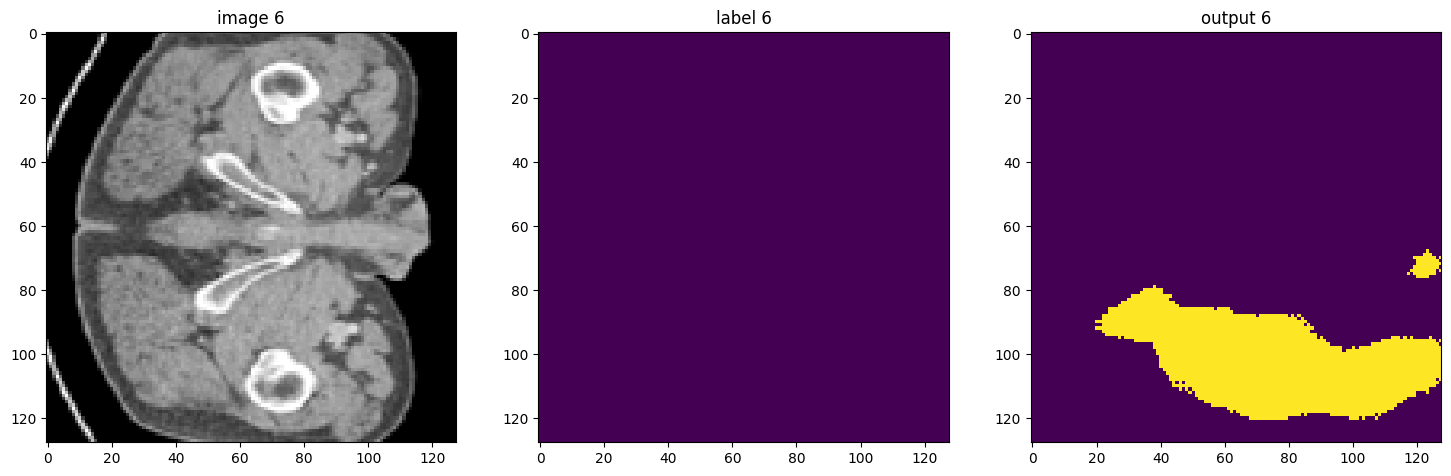

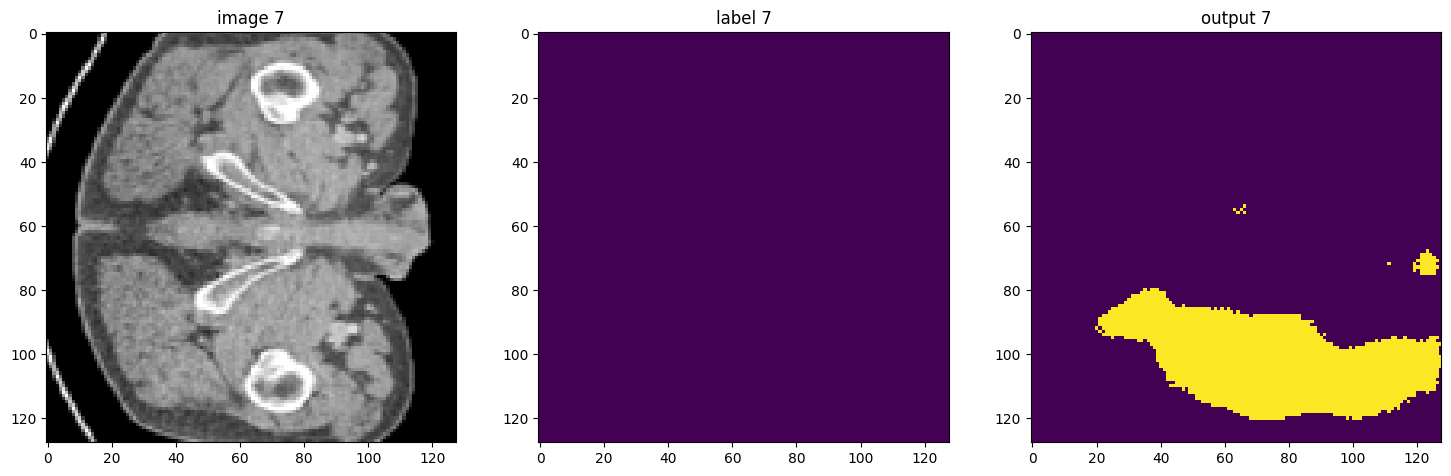

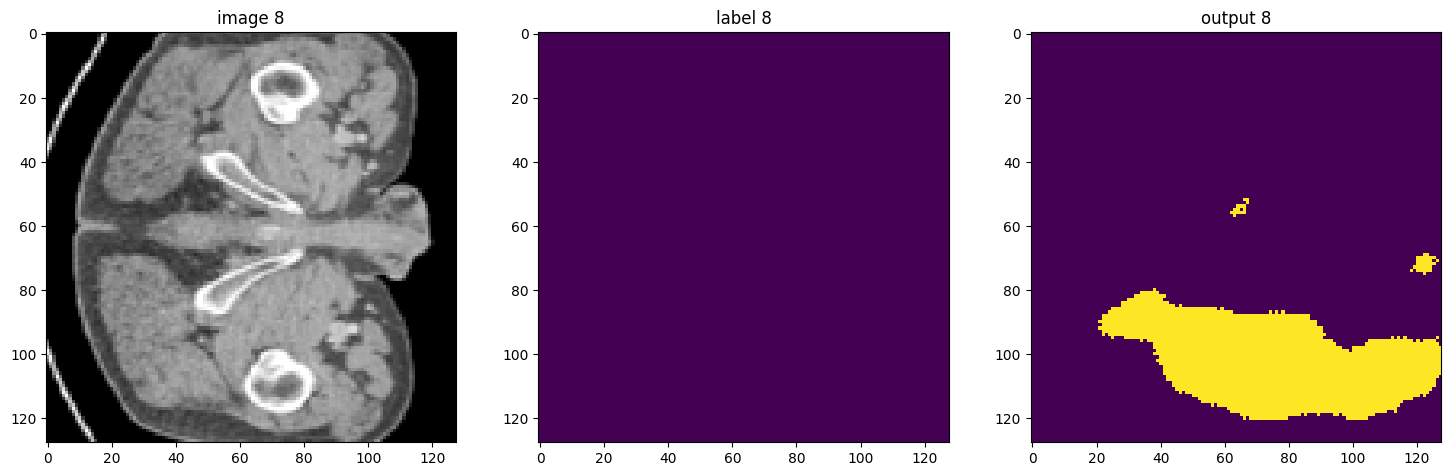

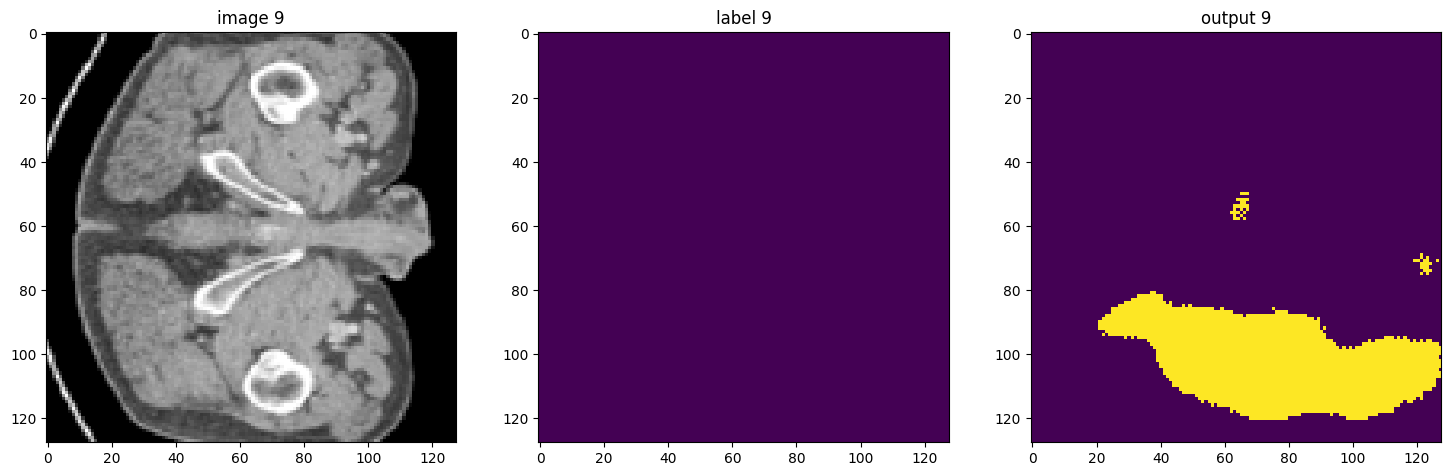

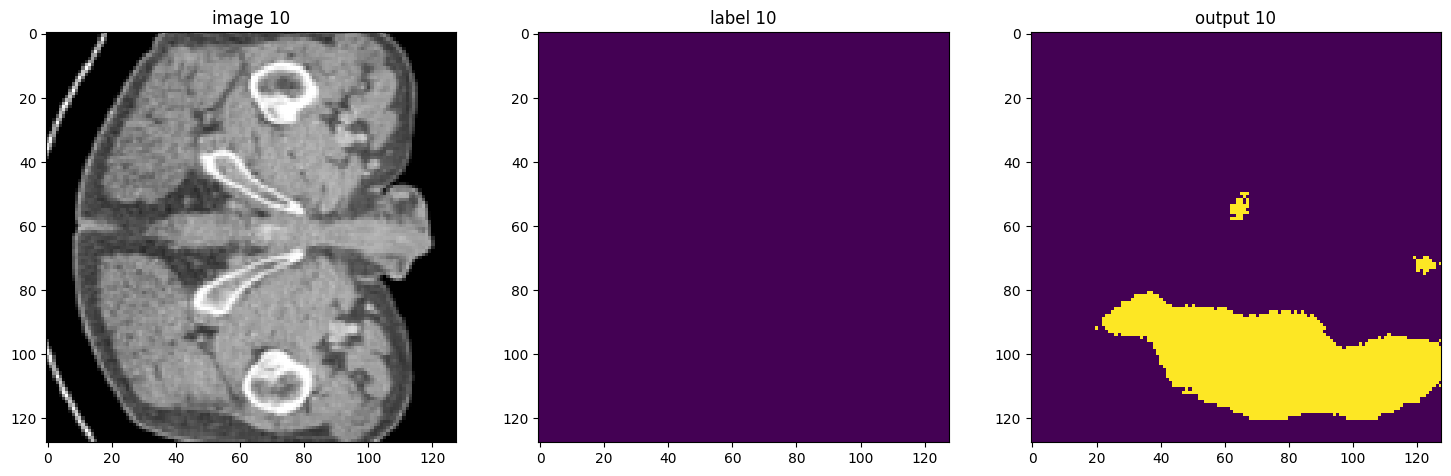

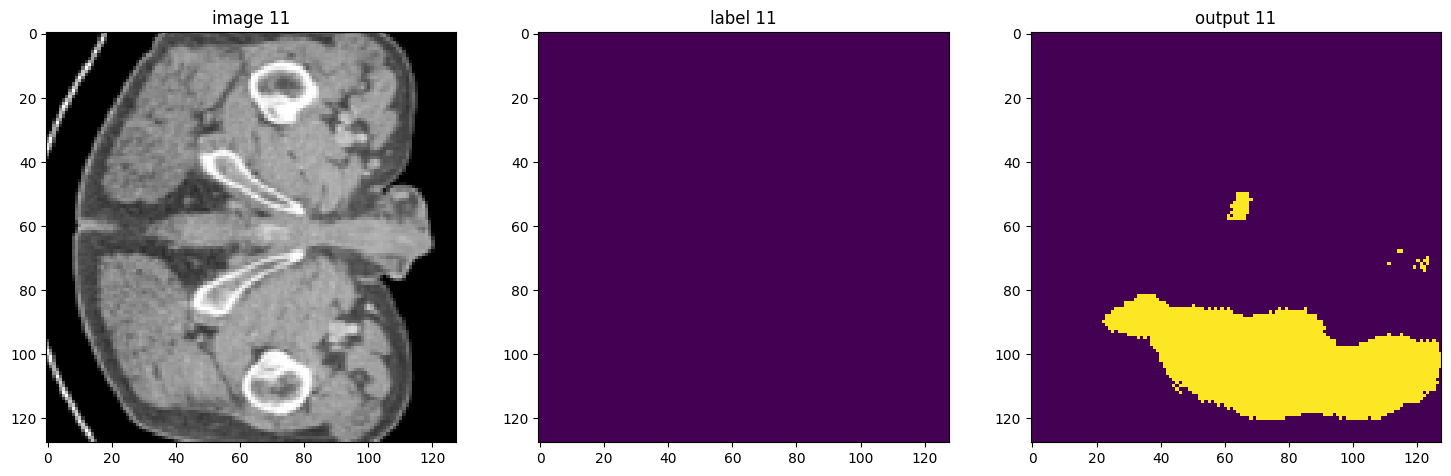

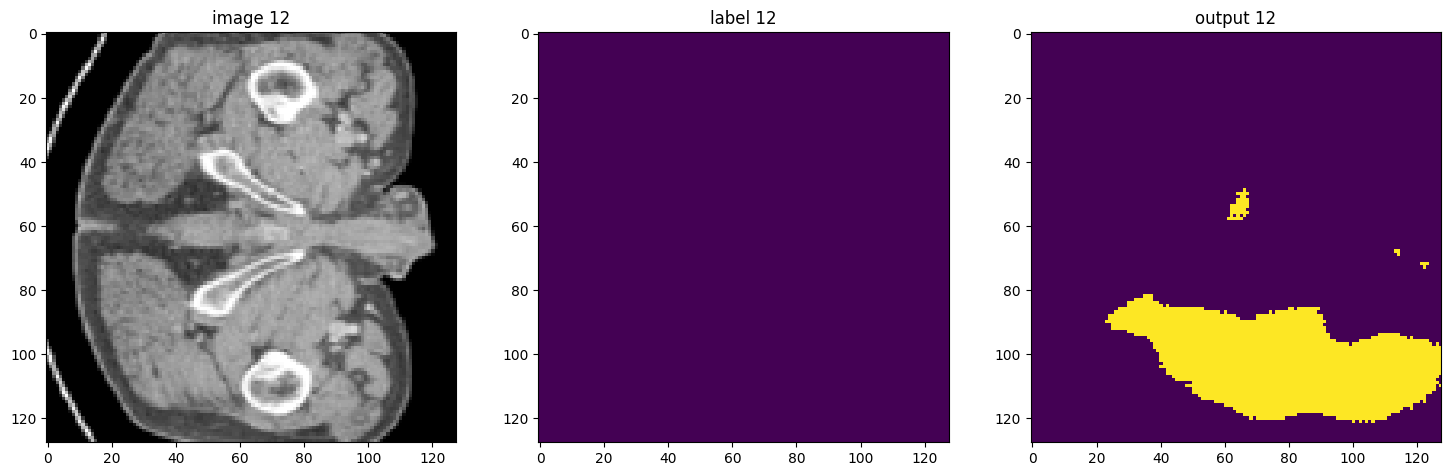

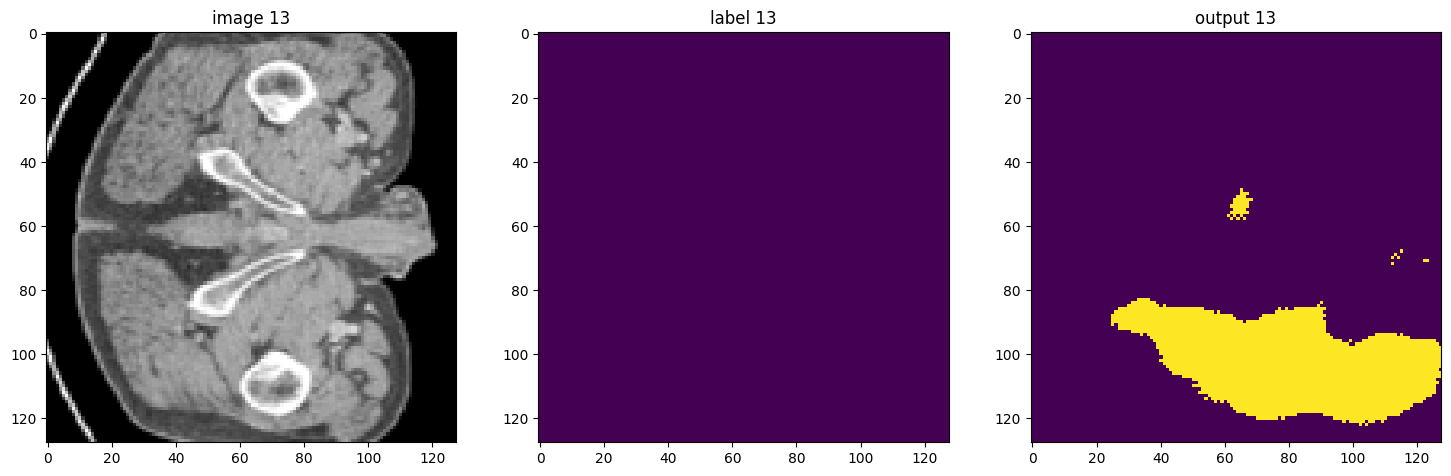

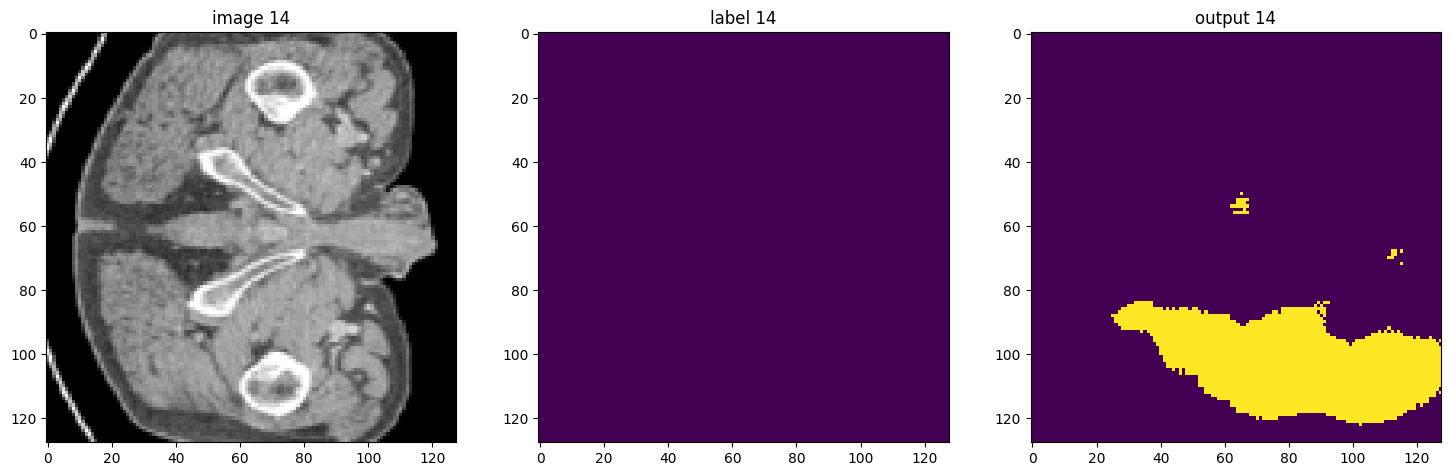

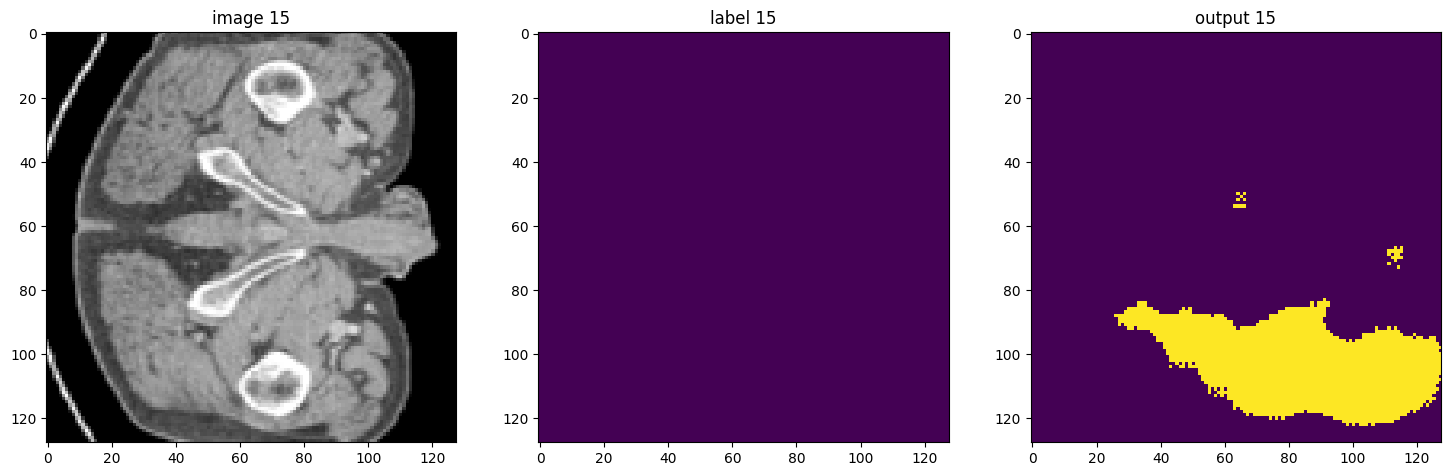

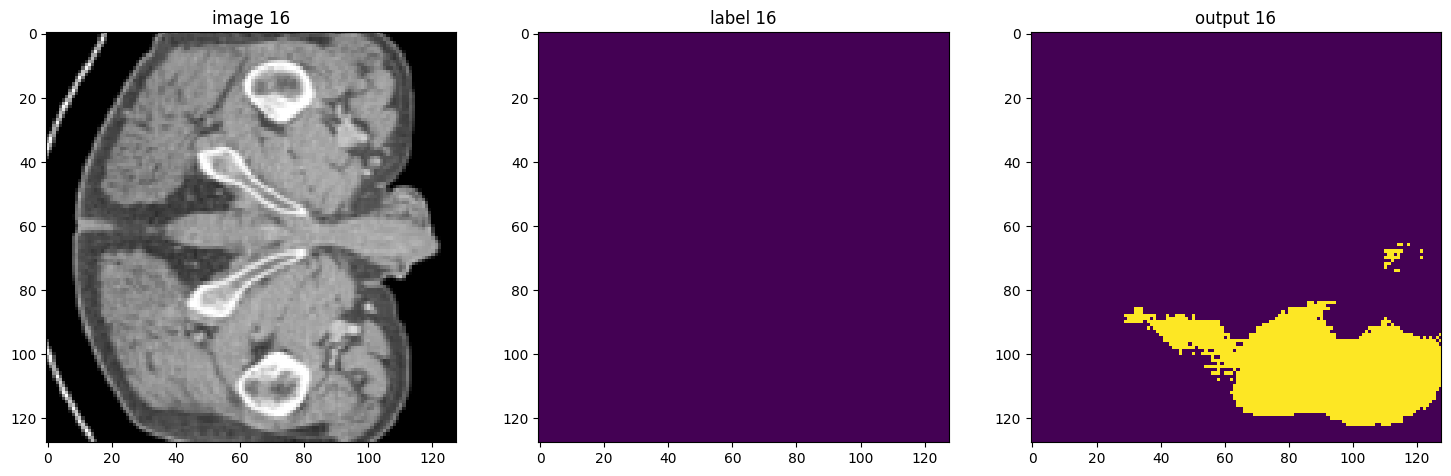

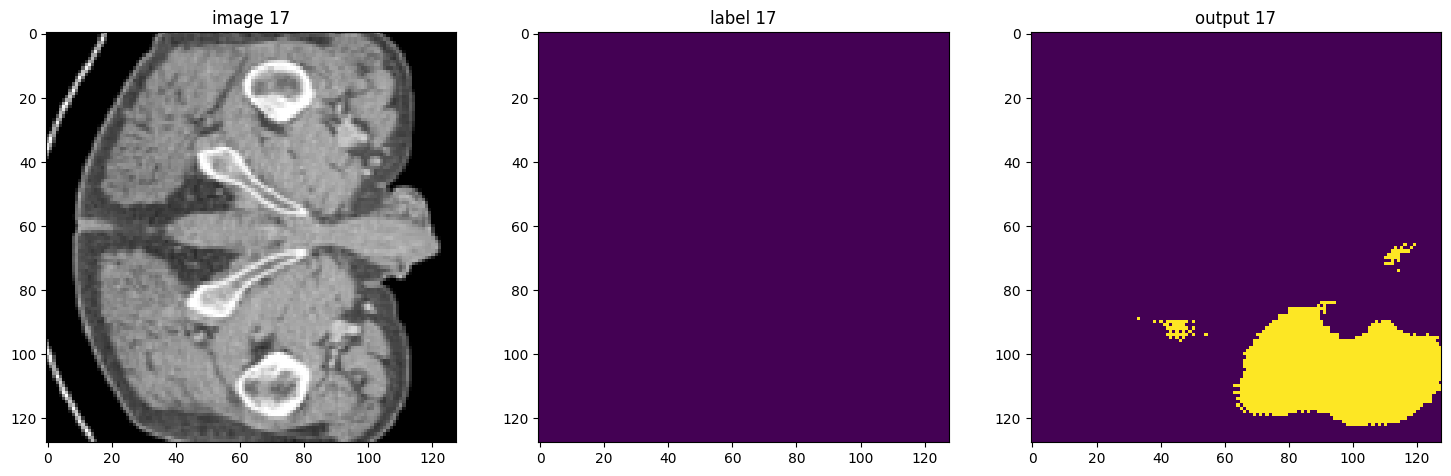

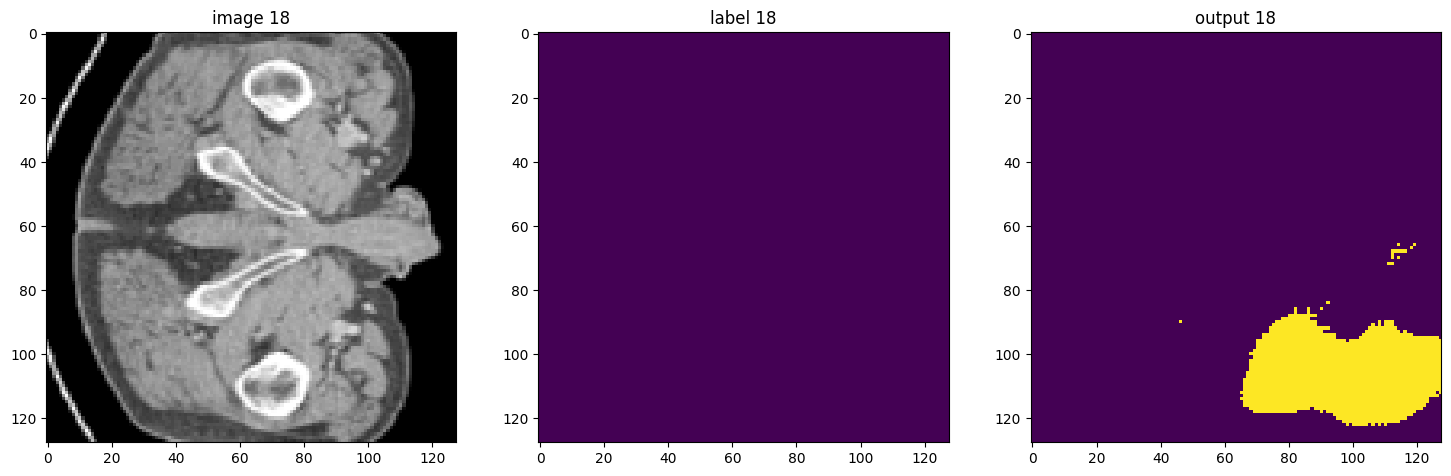

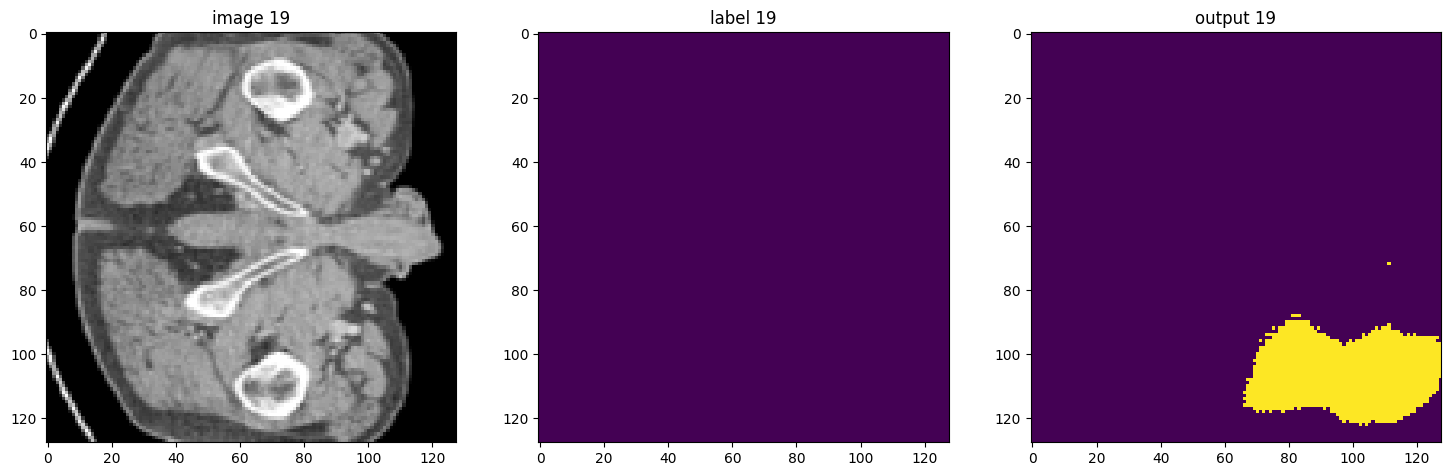

In [10]:
sw_batch_size = 4
roi_size = (128, 128, 64)
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['vol']
    #t_segmentation = test_patient['seg']
    
    test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.53
        
    for i in range(20):
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
        
           # save the figure as PNG image
        output_dir = 'D:/Liver_Segmentation/images'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        plt.savefig(os.path.join(output_dir, f"slice_{i}.jpg"))

        plt.show()
